# The Office - Exploratory data analysis of the TV series

# Intro

The subject of this notebook is the analysis of features and textual data based on a selected television series. It will include summary statistics on the series' viewership, ratings, writers, as well as statistics for each season. 

The Office

The Office is a television series of American production aired from 2005 to 2014. Despite the passage of almost 10 years since the final episode, it still enjoys unflagging popularity. It also represents a rich set of data in terms of the number of characters, the volume of their spoken dialogues, interactions between them and the number of scenes in which they appear.

# Preparing data

In [1]:
#Import related libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.option_context('mode.use_inf_as_na', True)

Datasets used in the analysis:

1) The Office Dataset
https://www.kaggle.com/datasets/nehaprabhavalkar/the-office-dataset
CC0: Public Domain

A dataset extracted from IMDB in csv format containing all episodes with information about the season, order in the season, brief description of the episode, rating, number of votes cast, viewership (in millions) , duration (in minutes), air date of the episode, as well as the names of directors and writers and guest appearances of other actors.

2) The Office Script lines
https://www.kaggle.com/datasets/lillitarhea/the-office-script-lines
CC0: Public Domain

A dataset in csv format with the scenario content of all episodes. The table takes the form
the form of a collection of all issues spoken by a given character, with the assigned
the scene in the episode in which it was spoken, the order of the episode in the season, and the season itself.
It also includes information on whether the scene was finally placed in the film or removed

3) The Office Episodes Data
https://www.kaggle.com/datasets/bcruise/the-office-episodes-data
CC0: Public Domain

A dataset in csv format containing information about episodes, their title, directors,
scriptwriters, date of broadcast, viewership, and episode order in general and in a given
season.

Let's import csv file into pandas dataframe structure.

In [2]:
df_general = pd.read_csv ('general.csv')

Let's display some of the general characteristics for those datasets.

In [3]:
display(df_general.sample(5))
display(df_general.describe())
display(df_general.info())

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
181,181,9,The Farm,Show follows Dwight Schrute a beet farmer runn...,7.5,2189,3.54,22,14 March 2013,NaN,Paul Lieberstein,Paul Lieberstein
17,17,2,The Injury,"Michael's ""injury"" from a George Foreman Grill...",9.1,4314,10.30,22,12 January 2006,NaN,Bryan Gordon,Mindy Kaling
74,74,5,Moroccan Christmas,Phyllis blackmails Angela into doing the work ...,8.4,2613,8.79,30,11 December 2008,NaN,Paul Feig,Justin Spitzer
83,83,5,Two Weeks,"As Michael prepares to leave Dunder Mifflin, h...",8.4,2492,8.45,30,26 March 2009,NaN,Paul Lieberstein,Aaron Shure
106,106,6,Manager and Salesman,Sabre's CEO wants the Scranton branch to have ...,8.1,2223,7.40,30,11 February 2010,NaN,Marc Webb,Mindy Kaling


,Unnamed: 0,Season,Ratings,Votes,Viewership,Duration
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,5.468085,8.237234,2838.228723,7.246330,27.053191
std,54.415071,2.386245,0.589930,1063.165290,2.066012,6.937254
min,0.000000,1.000000,6.600000,1832.000000,3.250000,19.000000
25%,46.750000,3.000000,7.800000,2187.750000,5.990000,22.000000
50%,93.500000,6.000000,8.200000,2614.000000,7.535000,23.000000
75%,140.250000,7.250000,8.600000,3144.250000,8.425000,30.000000
max,187.000000,9.000000,9.800000,10515.000000,22.910000,60.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    188 non-null    int64  
 1   Season        188 non-null    int64  
 2   EpisodeTitle  188 non-null    object 
 3   About         188 non-null    object 
 4   Ratings       188 non-null    float64
 5   Votes         188 non-null    int64  
 6   Viewership    188 non-null    float64
 7   Duration      188 non-null    int64  
 8   Date          188 non-null    object 
 9   GuestStars    29 non-null     object 
 10  Director      188 non-null    object 
 11  Writers       188 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 17.8+ KB


None

As shown on the quick summary, column "Unnamed: 0" has been duplicated from importing into data frames. We will set the index to 0.

In [4]:
df_general = df_general.set_index('Unnamed: 0').reset_index()
display(df_general.head(5))

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


As there are specified seasons for each episode, there are no information about which episode per season it is or which episode it is overall. We will try to add those information from other avaiable dataset - episode_viewers.

In [5]:
df_episodes_viewers = pd.read_csv ('episodes_viewers.csv')
display(df_episodes_viewers.head())
display(df_episodes_viewers.info())

,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
0,1,1,1,Pilot,Ken Kwapis,Ricky Gervais & Stephen Merchant and Greg Daniels,2005-03-24,1001,11200000.0
1,1,2,2,Diversity Day,Ken Kwapis,B. J. Novak,2005-03-29,1002,6000000.0
2,1,3,3,Health Care,Ken Whittingham,Paul Lieberstein,2005-04-05,1006,5800000.0
3,1,4,4,The Alliance,Bryan Gordon,Michael Schur,2005-04-12,1004,5400000.0
4,1,5,5,Basketball,Greg Daniels,Greg Daniels,2005-04-19,1005,5000000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   season                 201 non-null    int64  
 1   episode_num_in_season  201 non-null    int64  
 2   episode_num_overall    201 non-null    int64  
 3   title                  201 non-null    object 
 4   directed_by            201 non-null    object 
 5   written_by             201 non-null    object 
 6   original_air_date      201 non-null    object 
 7   prod_code              201 non-null    int64  
 8   us_viewers             201 non-null    float64
dtypes: float64(1), int64(4), object(4)
memory usage: 14.3+ KB


None

There is discrepancy between number of rows (episodes) between general datasets and episodes_viewers. In one dataset we have 188 episodes, whereas in the other 201. See how that situation affected each season separately, or there are some additional values we need to consider.

In [6]:
#Grouping episodes per season to check where are the discrepancy
df_general_per_season = df_general.groupby("Season")["EpisodeTitle"].count()
display(df_general_per_season)

df_episodes_viewers_per_season = df_episodes_viewers.groupby("season")["title"].count()
display(df_episodes_viewers_per_season)

Season
1     6
2    22
3    23
4    14
5    26
6    26
7    24
8    24
9    23
Name: EpisodeTitle, dtype: int64

season
1     6
2    22
3    25
4    19
5    28
6    26
7    26
8    24
9    25
Name: title, dtype: int64

Clearly, seasons 3,4,5,7 and 9 seems to have more episodes in dataset episodes_viewers. For start let's check season 4 as it has fewest episode to check and compare.

In [7]:
display(df_general.query('Season == 4'))
display(df_episodes_viewers.query('season == 4'))

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
51,51,4,Fun Run,Michael accidentally runs over Meridith in the...,8.8,3635,9.70,42,27 September 2007,NaN,Greg Daniels,Greg Daniels
52,52,4,Dunder Mifflin Infinity,Michael feels threatened when Ryan returns to ...,8.3,2934,8.49,42,4 October 2007,NaN,Craig Zisk,Michael Schur
53,53,4,Launch Party,The Dunder Mifflin Infinity website is launchi...,8.4,2844,8.91,42,11 October 2007,Kevin McHale,See full summary,Jennifer Celotta
54,54,4,Money,"As Jan renovates the condo, Michael confronts ...",8.7,3073,8.50,42,18 October 2007,NaN,Paul Lieberstein,Paul Lieberstein
55,55,4,Local Ad,Michael tries to make a local Dunder Mifflin c...,8.8,3125,8.98,22,25 October 2007,NaN,Jason Reitman,B. J. Novak
56,56,4,Branch Wars,Michael and Dwight try to play a prank on Kare...,8.5,2878,8.39,30,1 November 2007,NaN,Joss Whedon,Mindy Kaling
57,57,4,Survivor Man,After Michael isn't invited to a camping trip ...,8.2,2775,8.29,30,8 November 2007,NaN,Paul Feig,Steve Carell
58,58,4,The Deposition,Michael is put in an awkward position when Jan...,8.7,2923,8.86,30,15 November 2007,NaN,Julian Farino,Lester Lewis
59,59,4,Dinner Party,Michael invites Jim and Pam and Andy and Angel...,9.5,5601,9.22,30,10 April 2008,NaN,Paul Feig,Gene Stupnitsky | Lee Eisenberg
60,60,4,Chair Model,Kevin and Andy team up to reclaim the stolen D...,8.0,2757,9.81,30,17 April 2008,NaN,Jeffrey Blitz,B. J. Novak


,season,episode_num_in_season,episode_num_overall,title,directed_by,written_by,original_air_date,prod_code,us_viewers
53,4,1,54,Fun Run,Greg Daniels,Greg Daniels,2007-09-27,4001,9700000.0
54,4,2,55,Fun Run,Greg Daniels,Greg Daniels,2007-09-27,4002,9700000.0
55,4,3,56,Dunder Mifflin Infinity,Craig Zisk,Michael Schur,2007-10-04,4003,8490000.0
56,4,4,57,Dunder Mifflin Infinity,Craig Zisk,Michael Schur,2007-10-04,4004,8490000.0
57,4,5,58,Launch Party,Ken Whittingham,Jennifer Celotta,2007-10-11,4005,8910000.0
58,4,6,59,Launch Party,Ken Whittingham,Jennifer Celotta,2007-10-11,4006,8910000.0
59,4,7,60,Money,Paul Lieberstein,Paul Lieberstein,2007-10-18,4007,8500000.0
60,4,8,61,Money,Paul Lieberstein,Paul Lieberstein,2007-10-18,4008,8500000.0
61,4,9,62,Local Ad,Jason Reitman,B. J. Novak,2007-10-25,4009,8980000.0
62,4,10,63,Branch Wars,Joss Whedon,Mindy Kaling,2007-11-01,4010,8390000.0


Some of the episode are marked twice in the dataset 'episode_viewers'. A mistake? Rather not. As all columns for those doubled episodes seem to be identical, there is one that differ - prod_code. Those episode were specials with approximate 1 hour duration, and are marked differently depending on the dataset. In some datasets they are considered as longer episodes (general dataset) and some split them into two episodes. Considering them as a duplicated and later removing seems like a reasonable decision at first glance. However, it will damage the overall numbering (as there will be some missing values) and numbering per season. Therefore, adding new column manually with numbering seems to be better solution.

In [8]:
#Creating column No Overall
df_general.insert(1, "NoOverall", list(range(1,189)), True)
display(df_general)

,Unnamed: 0,NoOverall,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.20,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,2,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.00,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,3,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.80,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,4,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.40,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,5,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.00,23,19 April 2005,NaN,Greg Daniels,Greg Daniels
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,183,184,9,Stairmageddon,Dwight shoots Stanley with a bull tranquilizer...,8.0,1985,3.83,22,11 April 2013,NaN,Matt Sohn,Dan Sterling
184,184,185,9,Paper Airplane,The employees hold a paper airplane competitio...,8.0,2007,3.25,22,25 April 2013,NaN,Jesse Peretz,Halsted Sullivan | Warren Lieberstein
185,185,186,9,Livin' the Dream,Dwight becomes regional manager after Andy qui...,9.0,2831,3.51,42,2 May 2013,Michael Imperioli,Jeffrey Blitz,Niki Schwartz-Wright
186,186,187,9,A.A.R.M.,Dwight prepares for a marriage proposal and hi...,9.5,3914,4.56,43,9 May 2013,NaN,David Rogers,Brent Forrester


In [9]:
#Creating list for numbering per each season
episodes_seasons = []

# seasons - list containing number of episodes per each season
seasons = [6, 22, 23, 14, 26, 26, 24, 24, 23]

for x in seasons:
    y = [*range(1,(x+1),1)]
    episodes_seasons.append(y)
    
range_1 = [*range(1,(x+1),1)]


print(episodes_seasons)

print(type(episodes_seasons))

[[1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24], [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]]
<class 'list'>


In [10]:
#Flattening the results
flatten_episodes_seasons = sum(episodes_seasons, [])
print(flatten_episodes_seasons)

#Saving to a DataFrame structure
df_episodes_seasons = pd.DataFrame(flatten_episodes_seasons)
display(df_episodes_seasons)

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


,0
0,1
1,2
2,3
3,4
4,5
...,...
183,19
184,20
185,21
186,22


In [11]:
#Creating new column with episodes numbering per each season
df_general.insert(2, "NoPerSeason", flatten_episodes_seasons )
display(df_general.head())

,Unnamed: 0,NoOverall,NoPerSeason,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,1,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,2,2,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,3,3,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,4,4,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,5,5,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


Let's add also the 'key' column that will be having information about season and episode. For example episode 5 of season 4 will be marked as 4.5.

In [12]:
df_general["Key_episode"] = df_general['Season'].astype(str) + '.' + df_general['NoPerSeason'].astype(str)
first_column = df_general.pop('Key_episode') 
df_general.insert(1, 'Key_episode', first_column) 
display(df_general.sample(5))

,Unnamed: 0,Key_episode,NoOverall,NoPerSeason,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
95,95,6.5,96,5,6,Niagara: Part 2,Pam is forced to deal with an embarrassing inj...,9.4,3114,9.42,19,8 October 2009,NaN,Paul Feig,Greg Daniels | Mindy Kaling
165,165,9.1,166,1,9,New Guys,Dwight and Jim are intimidated by the office's...,7.6,2074,4.28,23,20 September 2012,NaN,Greg Daniels,Greg Daniels
139,139,7.23,140,23,7,"Dwight K. Schrute, (Acting) Manager","When Jim rejects Jo's offer, Dwight becomes ac...",8.7,2414,6.45,23,12 May 2011,NaN,Troy Miller,Justin Spitzer
48,48,3.21,49,21,3,Women's Appreciation,"Phyllis gets flashed in the parking lot, and D...",8.8,3158,7.00,29,3 May 2007,NaN,Tucker Gates,Gene Stupnitsky | Lee Eisenberg
172,172,9.8,173,8,9,The Target,Angela orders a hit on Oscar for cheating with...,7.8,1928,3.88,22,29 November 2012,NaN,Brent Forrester,Graham Wagner


Now, let's verify the dataset for missing and null values.

In [13]:
print(df_general.isnull().sum())

Unnamed: 0        0
Key_episode       0
NoOverall         0
NoPerSeason       0
Season            0
EpisodeTitle      0
About             0
Ratings           0
Votes             0
Viewership        0
Duration          0
Date              0
GuestStars      159
Director          0
Writers           0
dtype: int64


Apparently, only the column with GuestStars seems to be contains missing values. As it is not crucial for any other analysis, we will leave it. 
Before getting further into analysis, we will check if there are any outliers in numeric values columns.

In [14]:
df_general.describe(percentiles=[.1, .5, .9])

,Unnamed: 0,NoOverall,NoPerSeason,Season,Ratings,Votes,Viewership,Duration
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,93.500000,94.500000,11.877660,5.468085,8.237234,2838.228723,7.246330,27.053191
std,54.415071,54.415071,7.024855,2.386245,0.589930,1063.165290,2.066012,6.937254
min,0.000000,1.000000,1.000000,1.000000,6.600000,1832.000000,3.250000,19.000000
10%,18.700000,19.700000,3.000000,2.000000,7.600000,1969.300000,4.329000,22.000000
50%,93.500000,94.500000,11.500000,6.000000,8.200000,2614.000000,7.535000,23.000000
90%,168.300000,169.300000,22.000000,9.000000,9.000000,3767.200000,8.993000,30.000000
max,187.000000,188.000000,26.000000,9.000000,9.800000,10515.000000,22.910000,60.000000


The only alarming outliers seem to be Viewership and Votes maximal values. The mean value for Viewership is 7.24 (50% of all values oscilated around 7.53) whereas the maximum value is 22.91. For Votes mean value is 2838 (50% - 2614) and the maximum value here is nearly five times bigger - 10515. Let's see closely if there more outliers or is it just one time incident.

In [15]:
def top_rows_sorted(columns):
    for x in columns:
        display(df_general[['EpisodeTitle', x]].sort_values(by=[x], ascending=False).head(10))

selected_columns=['Votes','Viewership']
top_rows_sorted(selected_columns)

,EpisodeTitle,Votes
187,Finale,10515
77,Stress Relief,8170
137,"Goodbye, Michael",8059
59,Dinner Party,5601
0,Pilot,4936
132,Threat Level Midnight,4877
1,Diversity Day,4801
27,Casino Night,4765
94,Niagara: Part 1,4560
6,The Dundies,4315


,EpisodeTitle,Viewership
77,Stress Relief,22.91
0,Pilot,11.20
17,The Injury,10.30
40,The Return,10.20
39,Traveling Salesmen,10.12
41,Ben Franklin,10.11
60,Chair Model,9.81
15,Christmas Party,9.70
51,Fun Run,9.70
95,Niagara: Part 2,9.42


Episode "Stress Relief" has 22.91 millions viewers, which is much more than mean value for this category which is 7.24 millions. It could be a mistake, however research shows that this episode was aired following the Super Bowl in 2009 and it's been the most viewed episode in whole series. 
What is interesting, the most voted on IMDB episode The Finale is not even considered in the top 10 episodes regarding viewership, whereas Stress Relief is in both top 3 most viewed and most voted list.
Let's compare those two tables with other features such as Ratings and Duration.

In [16]:
selected_columns=['Votes','Viewership', 'Ratings', 'Duration']
top_rows_sorted(selected_columns)

,EpisodeTitle,Votes
187,Finale,10515
77,Stress Relief,8170
137,"Goodbye, Michael",8059
59,Dinner Party,5601
0,Pilot,4936
132,Threat Level Midnight,4877
1,Diversity Day,4801
27,Casino Night,4765
94,Niagara: Part 1,4560
6,The Dundies,4315


,EpisodeTitle,Viewership
77,Stress Relief,22.91
0,Pilot,11.20
17,The Injury,10.30
40,The Return,10.20
39,Traveling Salesmen,10.12
41,Ben Franklin,10.11
60,Chair Model,9.81
15,Christmas Party,9.70
51,Fun Run,9.70
95,Niagara: Part 2,9.42


,EpisodeTitle,Ratings
187,Finale,9.8
137,"Goodbye, Michael",9.8
77,Stress Relief,9.7
186,A.A.R.M.,9.5
59,Dinner Party,9.5
27,Casino Night,9.4
132,Threat Level Midnight,9.4
95,Niagara: Part 2,9.4
94,Niagara: Part 1,9.4
134,Garage Sale,9.3


,EpisodeTitle,Duration
77,Stress Relief,60
127,Classy Christmas,60
187,Finale,51
137,"Goodbye, Michael",50
186,A.A.R.M.,43
65,Weight Loss,43
37,A Benihana Christmas,42
185,Livin' the Dream,42
180,Moving On,42
140,Search Committee,42


As the episode "Finale" was not considered before in top voted episode, it is definitely in the top 3 of viewership, rating and duration. 
Stress relief episode is the only one that is considered in all top 3. It makes it special, also known as the best episode in the whole series and best overall television episode of any series in 2009 *

*https://en.wikipedia.org/wiki/Stress_Relief_(The_Office)

Now, as we have started this already, let's see some main features regarding the dataset.

# Overall analysis

At the begining let's look at the duration of the episodes.

Text(0.5, 0, 'Episodes from 1 to 188')

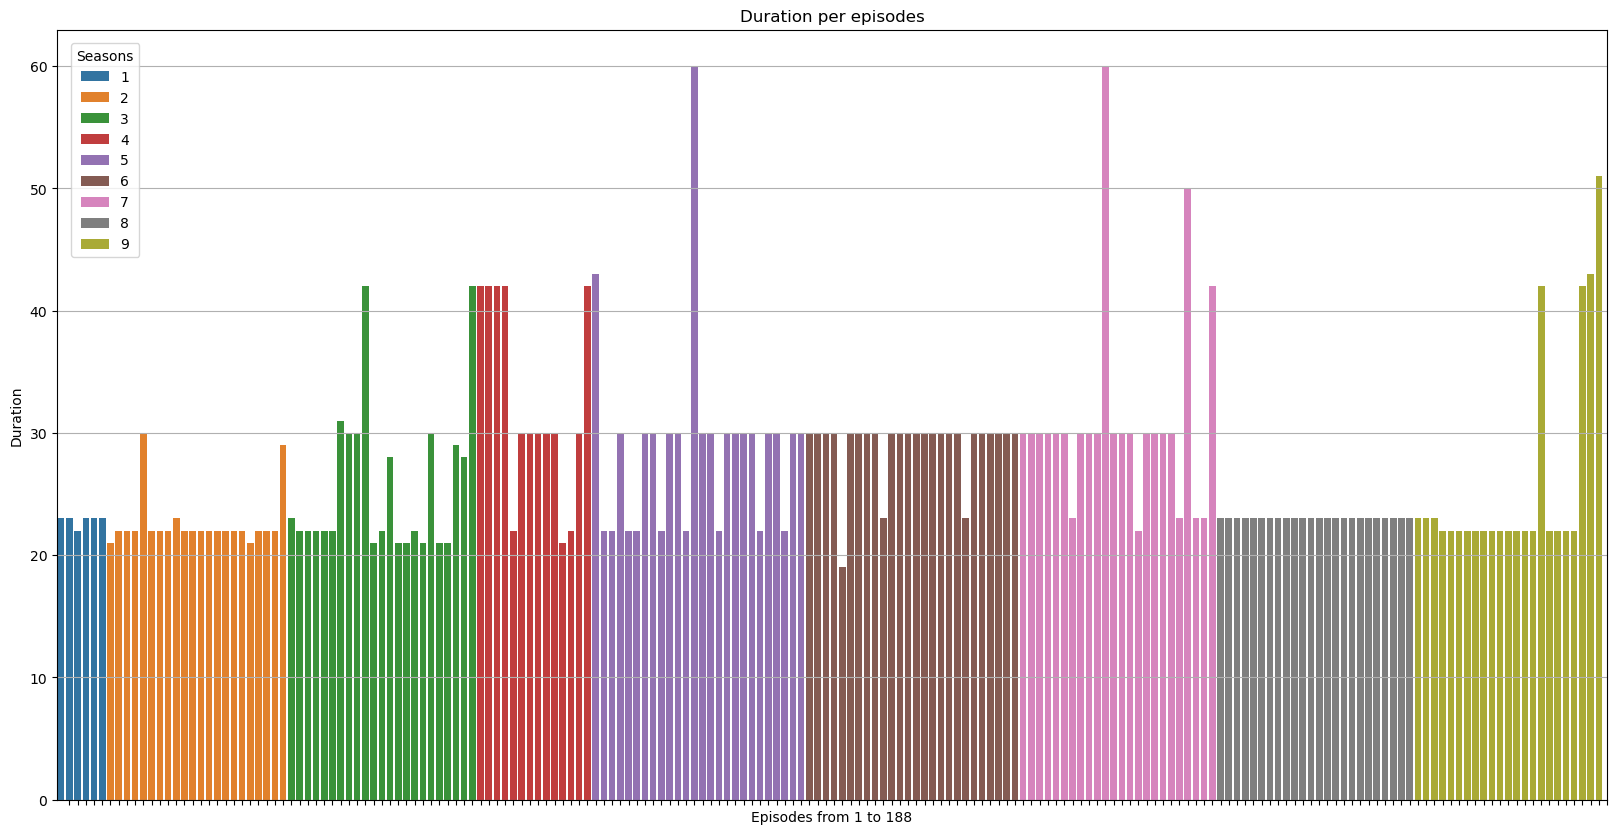

In [17]:
plt.figure(figsize=(20,10))
df_general['Season'] = df_general['Season'].astype(str)

sns.barplot(df_general, x="NoOverall", y="Duration", hue="Season", width=0.8, dodge=False)
plt.legend(title = 'Seasons', loc='upper left', borderaxespad=1)
plt.grid(axis='y')
plt.xticks(np.arange(1, 189, 1),visible=False)
plt.title("Duration per episodes")
plt.xlabel("Episodes from 1 to 188")

In [18]:
df_duration = df_general[["NoOverall"]].groupby(pd.cut(df_general["Duration"],[0,25,35,45,61]), observed=True).count()
df_duration = df_duration.rename(columns = {"NoOverall" : "Number of episodes"})
df_duration["Percentage"] = round((df_duration["Number of episodes"] / 188)*100)
display(df_duration)

,Number of episodes,Percentage
Duration,,
"(0, 25]",103,55.0
"(25, 35]",69,37.0
"(35, 45]",12,6.0
"(45, 61]",4,2.0


As shown above, out of 188 episodes 103 are up to 25 mins which give us the biggest group of 55 % of all episodes. Only four of them were longer than 45 mins.

The charts below represent how rating and viewership has changed through all episodes.

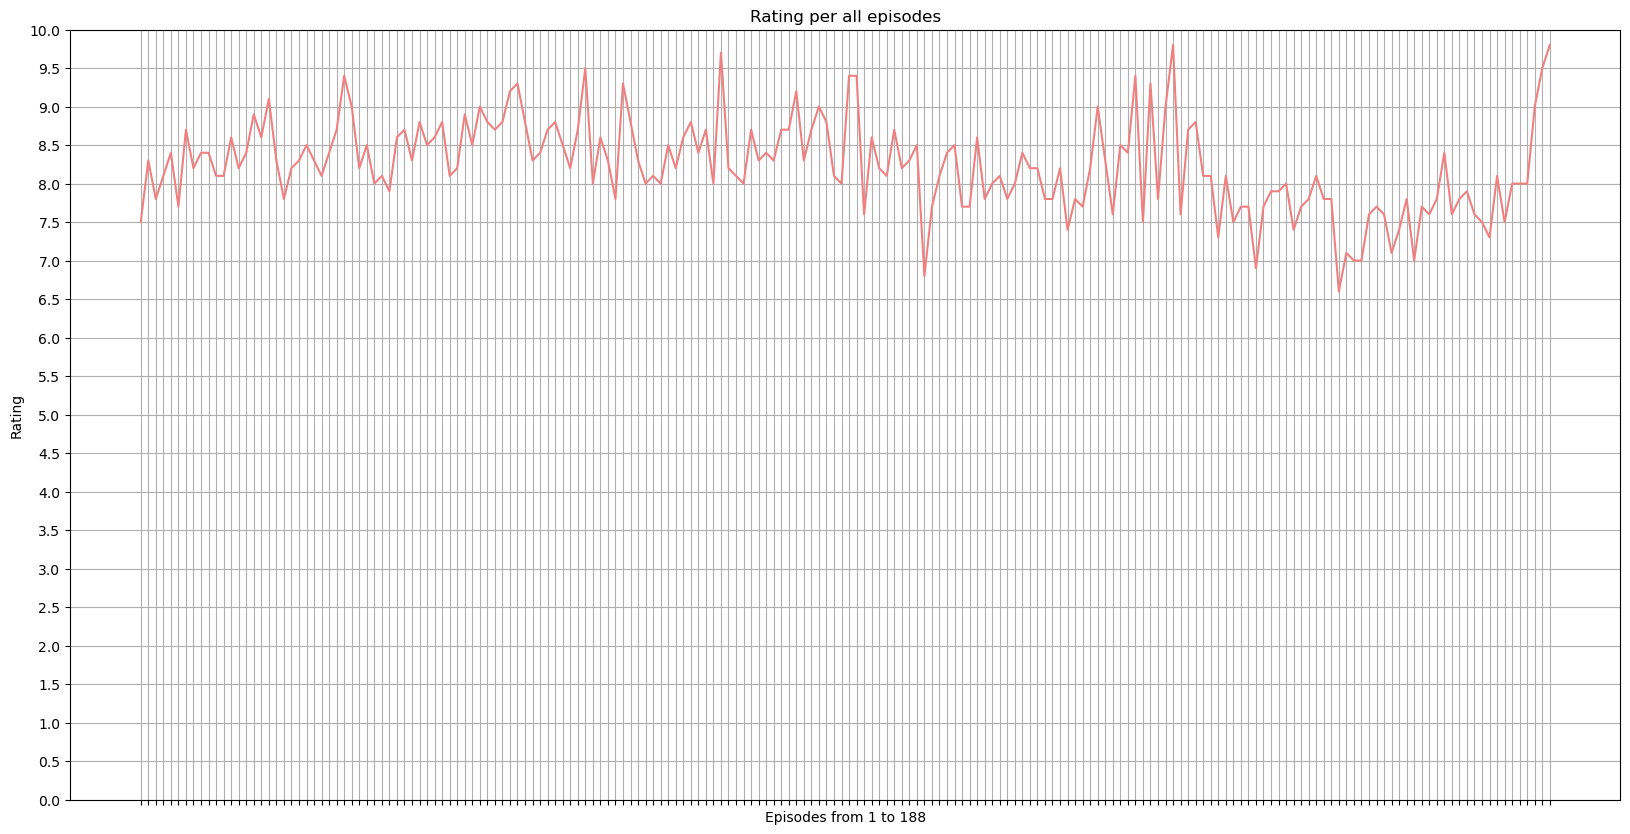

In [19]:
X = list(df_general['NoOverall'])
Y = list(df_general['Ratings'])
  
# Plot the data using bar() method
plt.figure(figsize=(20,10))
plt.plot(X, Y, color='lightcoral')
plt.xticks(np.arange(1, 189, 1),visible=False)
plt.yticks(np.arange(0, 10.5, 0.5))
plt.grid(True)
plt.ylabel("Rating")
plt.xlabel("Episodes from 1 to 188")
plt.title("Rating per all episodes")
  
# Show the plot
plt.show()

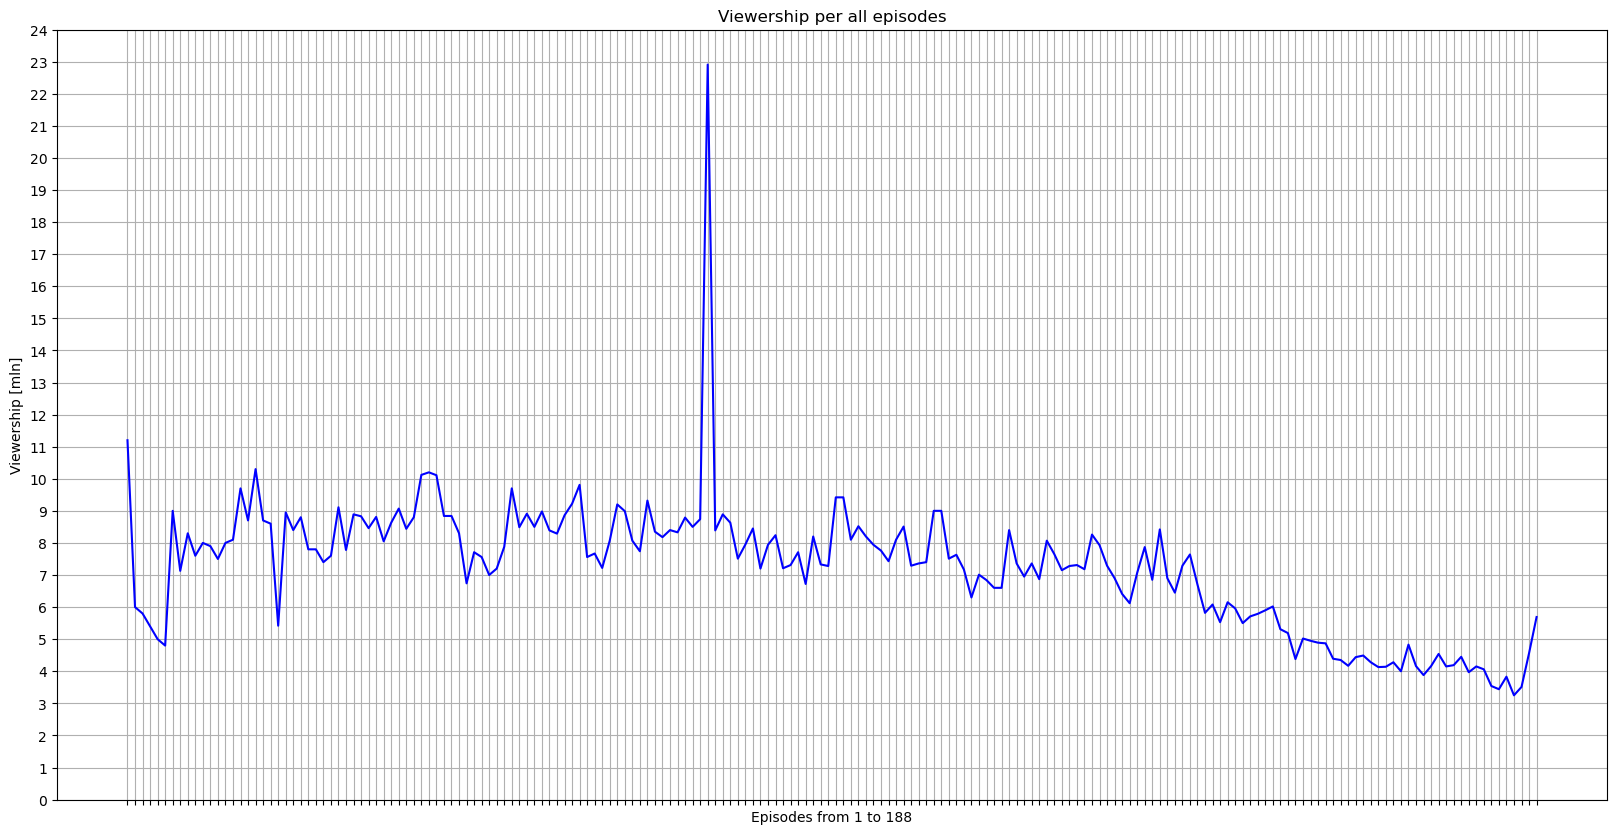

In [20]:
Y1 = list(df_general['Viewership'])
  
plt.figure(figsize=(20,10))
plt.plot(X, Y1, color='blue')
plt.xticks(np.arange(1, 189, 1),visible=False)
plt.yticks(np.arange(0, 25, 1))
plt.grid(True)
plt.xlabel("Episodes from 1 to 188")
plt.ylabel("Viewership [mln]")
plt.title("Viewership per all episodes")
  
# Show the plot
plt.show()

Let's see what was the average viewership per each season and see them together.


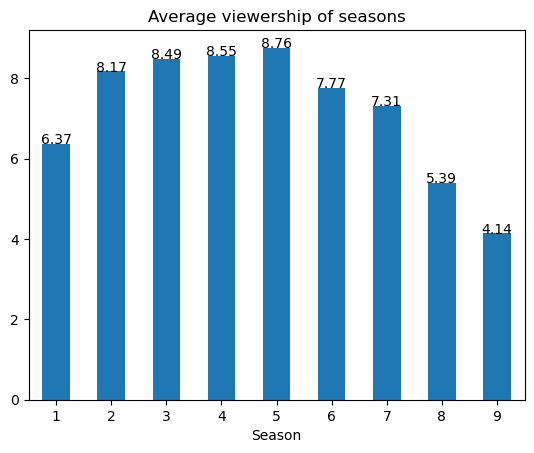

In [21]:
df_avg_viewership = df_general[['Season', 'Viewership']].groupby('Season',as_index=False)['Viewership'].agg('mean').round(2)

a1 = df_avg_viewership['Season']
b1 = df_avg_viewership['Viewership']

#Labels
def addlabels(a1,b1):
    for i in range(len(a1)):
        plt.text(i,b1[i],b1[i], ha="center")

ax = df_avg_viewership.plot.bar(x='Season', y='Viewership', rot=0, align='center')
addlabels(a1, b1)
ax.legend().set_visible(False)
plt.title("Average viewership of seasons")
plt.show()

/Users/kamila/anaconda3/envs/ds_python_3_9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kamila/anaconda3/envs/ds_python_3_9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


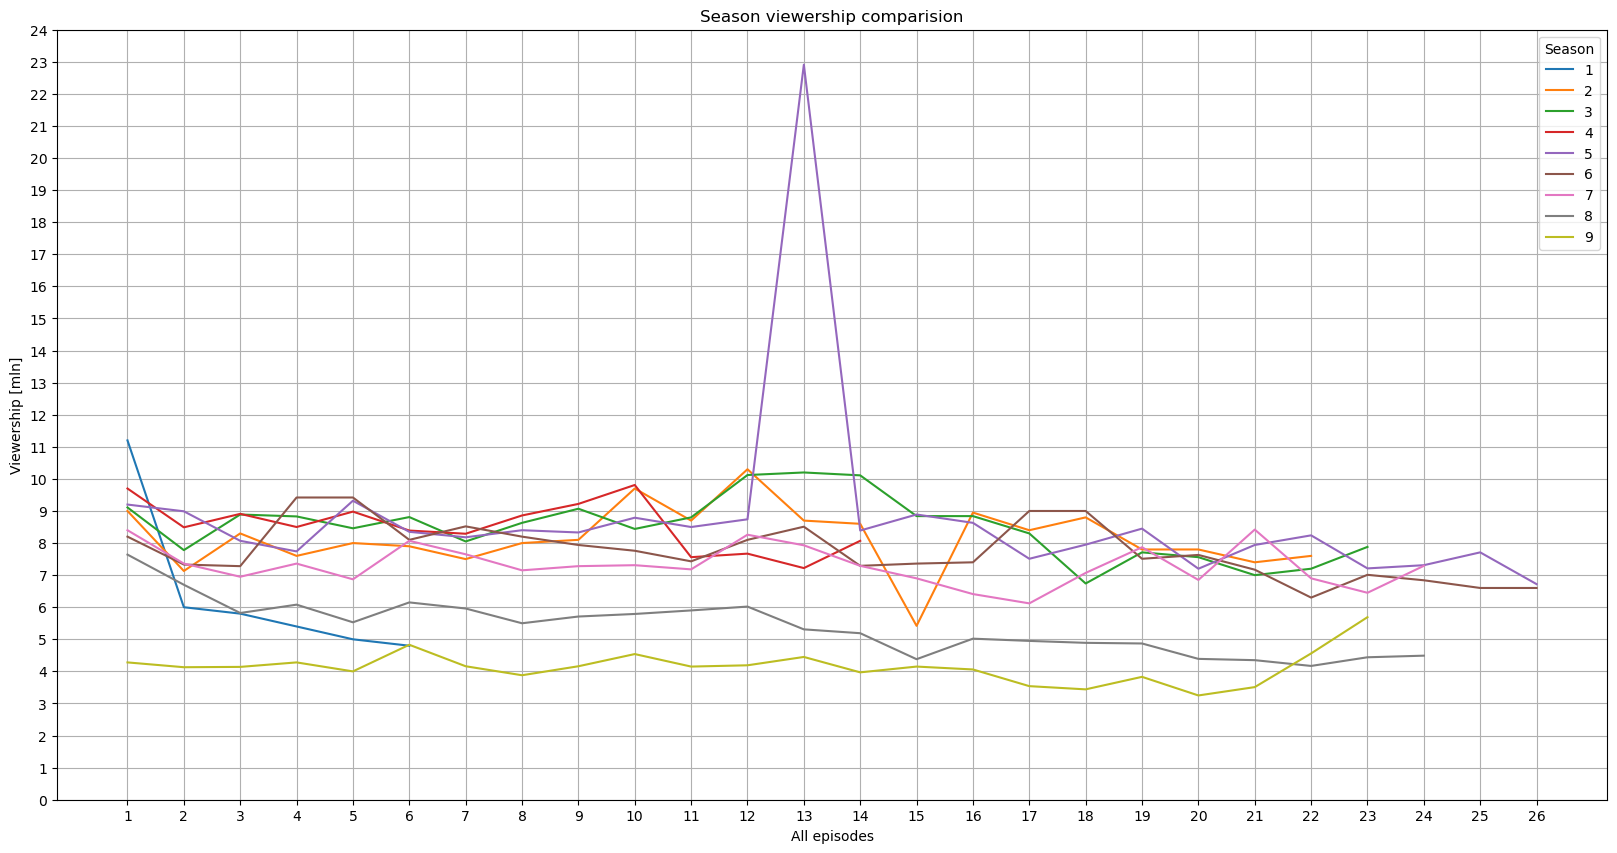

In [22]:
plt.figure(figsize=(20,10))

sns.lineplot(data = df_general, x = 'NoPerSeason', y = 'Viewership', hue = 'Season')
plt.grid(True)
plt.xlabel("All episodes")
plt.ylabel("Viewership [mln]")
plt.yticks(np.arange(0, 25, 1))
plt.xticks(np.arange(1, 27, 1))
plt.title("Season viewership comparision")
plt.show()

Now the same same for rating.

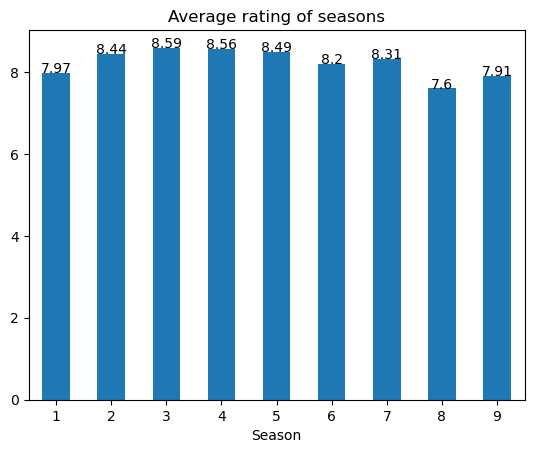

In [23]:
df_avg_rating = df_general[['Season', 'Ratings']].groupby('Season',as_index=False)['Ratings'].agg('mean').round(2)

a2 = df_avg_rating['Season']
b2 = df_avg_rating['Ratings']

ax = df_avg_rating.plot.bar(x='Season', y='Ratings', rot=0, align='center')
addlabels(a2, b2)
ax.legend().set_visible(False)
plt.title("Average rating of seasons")
plt.show()

/Users/kamila/anaconda3/envs/ds_python_3_9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/kamila/anaconda3/envs/ds_python_3_9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


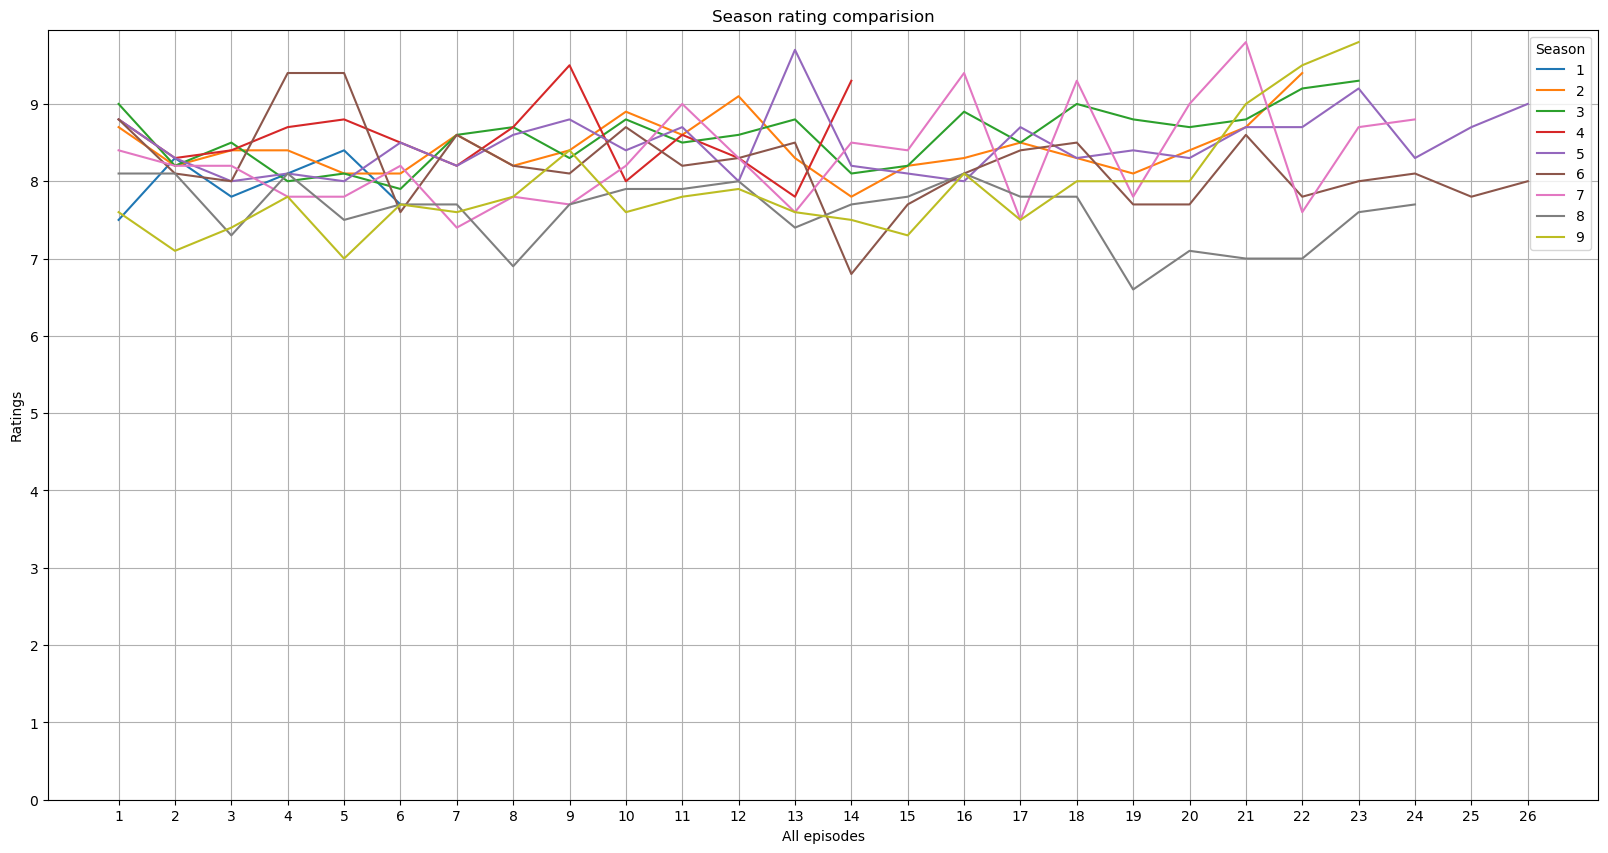

In [24]:
plt.figure(figsize=(20,10))

df_general.replace([np.inf, -np.inf], np.nan,inplace=True)
sns.lineplot(data = df_general, x = 'NoPerSeason', y = 'Ratings', hue = 'Season')
plt.grid(True)
plt.xlabel("All episodes")
plt.ylabel("Ratings")
plt.yticks(np.arange(0, 10, 1))
plt.xticks(np.arange(1, 27, 1))
plt.title("Season rating comparision")
plt.show()

This huge peak in viewership was mentioned just before, with value above 22.5 mln. It's episode called "Stress Relief" - episode no 13 in season 5. Let's see the top rated episodes in series.

In [25]:
top_rated_episodes = df_general.loc[df_general['Ratings'] > 8.5 ]
display(top_rated_episodes)

,Unnamed: 0,Key_episode,NoOverall,NoPerSeason,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
6,6,2.1,7,1,2,The Dundies,"Very much unlike his staff, an overeager Micha...",8.7,4315,9.00,21,20 September 2005,NaN,Greg Daniels,Mindy Kaling
12,12,2.7,13,7,2,The Client,With Michael and Jan Levinson-Gould away from ...,8.6,3533,7.50,22,8 November 2005,Tim Meadows,Greg Daniels,Paul Lieberstein
15,15,2.10,16,10,2,Christmas Party,Seeing the party is headed for disastrous bore...,8.9,3663,9.70,22,6 December 2005,NaN,Charles McDougall,Michael Schur
16,16,2.11,17,11,2,Booze Cruise,"The Dunder Mifflin staff go on a mandatory ""bo...",8.6,3536,8.70,22,5 January 2006,Rob Riggle,Ken Kwapis,Greg Daniels
17,17,2.12,18,12,2,The Injury,"Michael's ""injury"" from a George Foreman Grill...",9.1,4314,10.30,22,12 January 2006,NaN,Bryan Gordon,Mindy Kaling
26,26,2.21,27,21,2,Conflict Resolution,When Michael takes over conflict resolution du...,8.7,3253,7.40,22,4 May 2006,NaN,Charles McDougall,Greg Daniels
27,27,2.22,28,22,2,Casino Night,The Dunder Mifflin crew holds a casino party a...,9.4,4765,7.60,29,11 May 2006,NaN,Ken Kwapis,Steve Carell
28,28,3.1,29,1,3,Gay Witch Hunt,"Michael apologizes to Oscar, after he finds ou...",9.0,4133,9.11,23,21 September 2006,NaN,Ken Kwapis,Greg Daniels
34,34,3.7,35,7,3,Branch Closing,When Jan tells Michael that the Scranton Branc...,8.6,3021,8.05,31,9 November 2006,NaN,Tucker Gates,Michael Schur
35,35,3.8,36,8,3,The Merger,Jan informs Michael that the Scanton branch of...,8.7,3166,8.63,30,16 November 2006,NaN,Ken Whittingham,Brent Forrester


# The Script

We will try to determin what makes the rating so high based on the script content. We will use the dataset called 'scripts' that contains lines from every character in every episode together with the character's name.

In [26]:
df_scripts = pd.read_csv ('scripts.csv')
display(df_scripts.sample(5))
display(df_scripts.describe())
display(df_scripts.info())

,id,season,episode,scene,line_text,speaker,deleted
13737,13738,3,14,31,Yeah. Sorry.,Pam,False
9113,9114,2,22,5,Jan and I understand each other. The romance t...,Michael,False
43649,43650,7,18,12,"Um, I think I know. But I'll sound stupid if I...",Holly,False
54868,54869,9,8,16,"Oh, Monkey. Oh, I feel for you.",Dwight,False
48380,48381,8,9,37,"Okay, fine. Finish your set on your own and ne...",Dwight,False


,id,season,episode,scene
count,59909.000000,59909.000000,59909.000000,59909.000000
mean,29955.000000,5.348178,11.558597,27.143852
std,17294.382975,2.389427,6.986208,17.860616
min,1.000000,1.000000,1.000000,1.000000
25%,14978.000000,3.000000,5.000000,14.000000
50%,29955.000000,5.000000,11.000000,25.000000
75%,44932.000000,7.000000,18.000000,37.000000
max,59909.000000,9.000000,26.000000,116.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59909 entries, 0 to 59908
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         59909 non-null  int64 
 1   season     59909 non-null  int64 
 2   episode    59909 non-null  int64 
 3   scene      59909 non-null  int64 
 4   line_text  59909 non-null  object
 5   speaker    59909 non-null  object
 6   deleted    59909 non-null  bool  
dtypes: bool(1), int64(4), object(2)
memory usage: 2.8+ MB


None

Luckily, there are no null values in our datasets. Let's check whether the numbering of episodes is matching the dataset df_general.

In [27]:
print(df_general_per_season)

df_episodes_scripts_per_season = df_scripts.groupby("season")['episode'].aggregate(['min','max'])

print(df_episodes_scripts_per_season)

Season
1     6
2    22
3    23
4    14
5    26
6    26
7    24
8    24
9    23
Name: EpisodeTitle, dtype: int64
        min  max
season          
1         1    6
2         1   22
3         1   23
4         1   14
5         1   26
6         1   24
7         1   24
8         1   24
9         1   23


Unfortunately number of episodes in season 6 does not match in both datasets. It could be a question of missing data, but perhaps we have another example of different episode numbering and considering one bigger episode as two separate ones. Let's see whether we have some 'two-parts' episodes in season 6.

In [28]:
display(df_general.loc[df_general['Season'] == '6'])

,Unnamed: 0,Key_episode,NoOverall,NoPerSeason,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
91,91,6.1,92,1,6,Gossip,Michael regrets revealing that Stanley is havi...,8.8,2866,8.20,30,17 September 2009,NaN,Paul Lieberstein,Paul Lieberstein
92,92,6.2,93,2,6,The Meeting,Michael sabotages--then promotes--Jim's effort...,8.1,2349,7.33,30,24 September 2009,NaN,Randall Einhorn,Aaron Shure
93,93,6.3,94,3,6,The Promotion,Jim discovers just how hard being the boss can...,8.0,2344,7.28,30,1 October 2009,NaN,Jennifer Celotta,Jennifer Celotta
94,94,6.4,95,4,6,Niagara: Part 1,The Office travels to Niagara Falls to celebra...,9.4,4560,9.42,30,8 October 2009,NaN,Paul Feig,Greg Daniels | Mindy Kaling
95,95,6.5,96,5,6,Niagara: Part 2,Pam is forced to deal with an embarrassing inj...,9.4,3114,9.42,19,8 October 2009,NaN,Paul Feig,Greg Daniels | Mindy Kaling
96,96,6.6,97,6,6,Mafia,Michael meets with an insurance salesman that ...,7.6,2464,8.10,30,15 October 2009,Mike Starr,David Rogers,Brent Forrester
97,97,6.7,98,7,6,The Lover,Jim and Pam return from their honeymoon and le...,8.6,2590,8.52,30,22 October 2009,NaN,Lee Eisenberg,Lee Eisenberg | Gene Stupnitsky
98,98,6.8,99,8,6,Koi Pond,Michael is upset when he becomes the butt of a...,8.2,2348,8.20,30,29 October 2009,NaN,Reginald Hudlin,Warren Lieberstein | Halsted Sullivan
99,99,6.9,100,9,6,Double Date,Michael sparks more anger from Pam when he bre...,8.1,2314,7.94,30,5 November 2009,NaN,Seth Gordon,Charlie Grandy
100,100,6.10,101,10,6,Murder,The entire office is preoccupied about rumors ...,8.7,2761,7.76,23,12 November 2009,NaN,Greg Daniels,Daniel Chun


We have two episodes like this: Niagara (6.4-6.5) and The Delivery (6.17 - 6.18). If those were considered as whole episodes, its numbering should be Niagara - 6.4 and The Delivery 6.16. See if the number of lines for those episodes differ from other episodes in season.

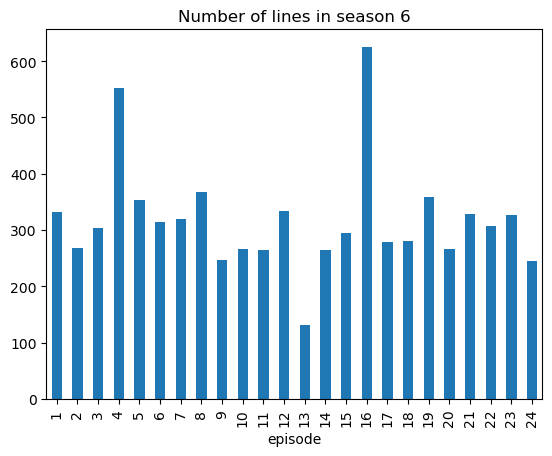

In [29]:
df_season_6 = df_scripts.loc[df_scripts['season'] == 6]

df_season_6_count = df_season_6.groupby('episode', as_index=False)['line_text'].count()
df_season_6_count = df_season_6_count.sort_values(by=['episode'])

ax = df_season_6_count.plot.bar(x='episode', y='line_text', rot=90)

plt.title("Number of lines in season 6")
ax.legend().set_visible(False)
plt.show()

As predicted, episodes 4 and 16 have twice as much lines as other episodes in season. Technically, dataset seems to be correct. Unfortunately, as there is no dataset to distinguish which line is the last one in parts one of those episodes, we need to merge those two episodes into one in df_general dataframe.

In [30]:
df_general_to_merge = df_general[['Key_episode','Season','NoPerSeason','EpisodeTitle','Ratings','Viewership']]
display(df_general_to_merge)

,Key_episode,Season,NoPerSeason,EpisodeTitle,Ratings,Viewership
0,1.1,1,1,Pilot,7.5,11.20
1,1.2,1,2,Diversity Day,8.3,6.00
2,1.3,1,3,Health Care,7.8,5.80
3,1.4,1,4,The Alliance,8.1,5.40
4,1.5,1,5,Basketball,8.4,5.00
...,...,...,...,...,...,...
183,9.19,9,19,Stairmageddon,8.0,3.83
184,9.20,9,20,Paper Airplane,8.0,3.25
185,9.21,9,21,Livin' the Dream,9.0,3.51
186,9.22,9,22,A.A.R.M.,9.5,4.56


As we remember, there is a difference in two episodes, between dataframes df_general and the one above. Let's check whether the two parts of the same episode have the same values in corresponding columns.

In [31]:
display(df_general_to_merge.loc[df_general_to_merge['EpisodeTitle'].str.contains('Niagara')])
display(df_general_to_merge.loc[df_general_to_merge['EpisodeTitle'].str.contains('Delivery')])

,Key_episode,Season,NoPerSeason,EpisodeTitle,Ratings,Viewership
94,6.4,6,4,Niagara: Part 1,9.4,9.42
95,6.5,6,5,Niagara: Part 2,9.4,9.42


,Key_episode,Season,NoPerSeason,EpisodeTitle,Ratings,Viewership
107,6.17,6,17,The Delivery: Part 1,8.4,9.0
108,6.18,6,18,The Delivery: Part 2,8.5,9.0


In episode Niagara, the values are identical, however in the Delivery there is a slight difference in ratings. We will then drop both of the duplicated row, and in the Delivery, the rating will be changed to mean average - 8.45.

In [32]:
df_general_to_merge = df_general_to_merge.drop(index=95)
display(df_general_to_merge.loc[df_general_to_merge['EpisodeTitle'].str.contains('Niagara')])

,Key_episode,Season,NoPerSeason,EpisodeTitle,Ratings,Viewership
94,6.4,6,4,Niagara: Part 1,9.4,9.42


In [33]:
display(df_general_to_merge.loc[df_general_to_merge['EpisodeTitle'].str.contains('Delivery')])

,Key_episode,Season,NoPerSeason,EpisodeTitle,Ratings,Viewership
107,6.17,6,17,The Delivery: Part 1,8.4,9.0
108,6.18,6,18,The Delivery: Part 2,8.5,9.0


In [34]:
df_general_to_merge = df_general_to_merge.drop(index=108)
display(df_general_to_merge.loc[df_general_to_merge['EpisodeTitle'].str.contains('Delivery')])

,Key_episode,Season,NoPerSeason,EpisodeTitle,Ratings,Viewership
107,6.17,6,17,The Delivery: Part 1,8.4,9.0


Let's reset the indexing and set the average rating value for episode The Delivery.

In [35]:
df_general_to_merge = df_general_to_merge.dropna().reset_index(drop=True)
df_general_to_merge.at[106,'Ratings'] = 8.45
display(df_general_to_merge.loc[df_general_to_merge['Season'] == '6'])

,Key_episode,Season,NoPerSeason,EpisodeTitle,Ratings,Viewership
91,6.1,6,1,Gossip,8.80,8.20
92,6.2,6,2,The Meeting,8.10,7.33
93,6.3,6,3,The Promotion,8.00,7.28
94,6.4,6,4,Niagara: Part 1,9.40,9.42
95,6.6,6,6,Mafia,7.60,8.10
96,6.7,6,7,The Lover,8.60,8.52
97,6.8,6,8,Koi Pond,8.20,8.20
98,6.9,6,9,Double Date,8.10,7.94
99,6.10,6,10,Murder,8.70,7.76
100,6.11,6,11,Shareholder Meeting,8.20,7.43


As we can see, the 'Key_episode' and "NoPerSeason" columns are now showing incorrect information. As the dataset is relatively small, we will change them manually.

In [36]:
episodes_seasons_2 = []

# seasons - list containing number of episodes per each season in dataset Scripts
seasons_2 = [6, 22, 23, 14, 26, 24, 24, 24, 23]

for x in seasons_2:
    y = [*range(1,(x+1),1)]
    episodes_seasons_2.append(y)
    
range_1 = [*range(1,(x+1),1)]

#Flattening the results
flatten_episodes_seasons_2 = sum(episodes_seasons_2, [])
print(flatten_episodes_seasons_2)

[1, 2, 3, 4, 5, 6, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


Now we will replace the incorrect values.

In [37]:
df_general_to_merge['NoPerSeason'] = flatten_episodes_seasons_2

df_general_to_merge["Key_episode"] = df_general_to_merge['Season'].astype(str) + '.' + df_general_to_merge['NoPerSeason'].astype(str)
first_column_2 = df_general_to_merge.pop('Key_episode') 
df_general_to_merge.insert(1, 'Key_episode', first_column_2)

As the general dataframe seems to be prepared for further work, we will take a look at it and the scripts dataset alltogether.

In [38]:
display(df_general_to_merge)
display(df_scripts)

,Season,Key_episode,NoPerSeason,EpisodeTitle,Ratings,Viewership
0,1,1.1,1,Pilot,7.5,11.20
1,1,1.2,2,Diversity Day,8.3,6.00
2,1,1.3,3,Health Care,7.8,5.80
3,1,1.4,4,The Alliance,8.1,5.40
4,1,1.5,5,Basketball,8.4,5.00
...,...,...,...,...,...,...
181,9,9.19,19,Stairmageddon,8.0,3.83
182,9,9.20,20,Paper Airplane,8.0,3.25
183,9,9.21,21,Livin' the Dream,9.0,3.51
184,9,9.22,22,A.A.R.M.,9.5,4.56


,id,season,episode,scene,line_text,speaker,deleted
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...,...
59904,59905,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,False
59905,59906,9,23,113,I just feel lucky that I got a chance to share...,Meredith,False
59906,59907,9,23,114,I'm happy that this was all filmed so I can re...,Phyllis,False
59907,59908,9,23,115,I sold paper at this company for 12 years. My ...,Jim,False


Appratently there is no one key value between those two datasets. As we will be later performing some tests based on those two combined, we will add the same key_episode index to the scripts datasets.

In [39]:
df_scripts["Key_episode"] = df_scripts['season'].astype(str) + '.' + df_scripts['episode'].astype(str)
display(df_scripts)

,id,season,episode,scene,line_text,speaker,deleted,Key_episode
0,1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False,1.1
1,2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False,1.1
2,3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False,1.1
3,4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False,1.1
4,5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False,1.1
...,...,...,...,...,...,...,...,...
59904,59905,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,False,9.23
59905,59906,9,23,113,I just feel lucky that I got a chance to share...,Meredith,False,9.23
59906,59907,9,23,114,I'm happy that this was all filmed so I can re...,Phyllis,False,9.23
59907,59908,9,23,115,I sold paper at this company for 12 years. My ...,Jim,False,9.23


# Lines in the series

As the series has 9 seasons with approximately 20 episode in each it is a vaste dataset when it comes to text analysis in tv series. Let's have a look at some overall informations. For example how many lines were spoken in each season.

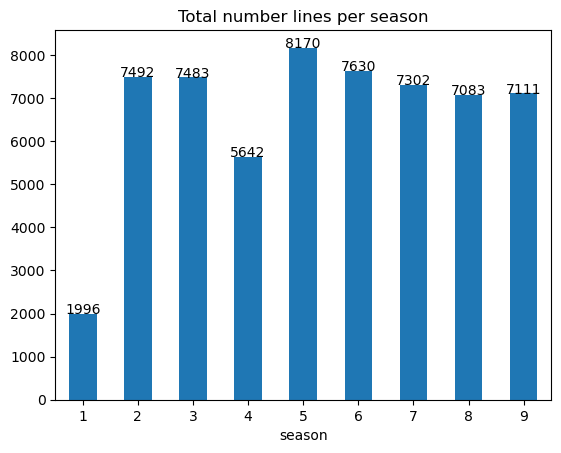

In [40]:
df_scripts_count=df_scripts.groupby('season', as_index=False)['id'].count()

a3 = df_scripts_count['season']
b3 = df_scripts_count['id']

ax = df_scripts_count.plot.bar(x='season', y='id', rot=0)
addlabels(a3, b3)
plt.title("Total number lines per season")
ax.legend().set_visible(False)
plt.show()

While this chart represent exact number of spoken lines it is not quite proper when it comes to comparing which season was 'the most spoken'. We have to remember that each season differ in number of episodes. 7 seasons out of 9 had more than 20 episodes, one has only 14 (season 4) and one only 6 episodes (season 1). This is clearly visible in the chart. To see it better, we will transform it to see what was the average number of lines per episode for each season.

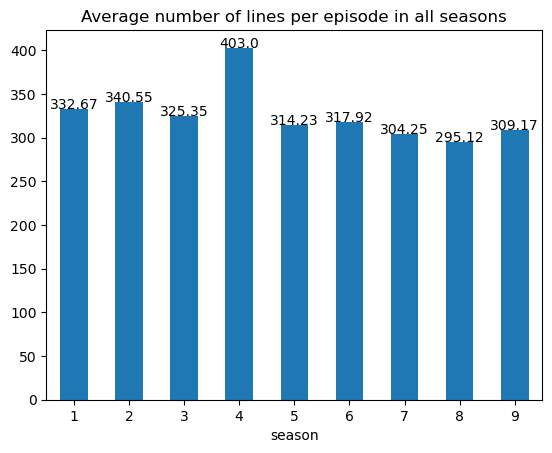

In [41]:
df_scripts_count_lines = df_scripts.groupby(['season','episode'], as_index=False)['line_text'].count()
df_scripts_avg_lines = df_scripts_count_lines.groupby('season', as_index=False)['line_text'].mean().round(2)

#display(df_scripts_avg_lines)


a4 = df_scripts_avg_lines['season']
b4 = df_scripts_avg_lines['line_text']

ax = df_scripts_avg_lines.plot.bar(x='season', y='line_text', rot=0)
addlabels(a4, b4)
plt.title("Average number of lines per episode in all seasons")
ax.legend().set_visible(False)
plt.show()

Season 4 was the most spoken definitely, while season 8 was the least one. 
Now, this is a good start to ask how does the script affect feautres such as viewership or rating? To find answers to that question we need to use two datasets - general and scripts. Let's have a look at them together.

In [42]:
display(df_general_to_merge)
display(df_scripts_count_lines)

,Season,Key_episode,NoPerSeason,EpisodeTitle,Ratings,Viewership
0,1,1.1,1,Pilot,7.5,11.20
1,1,1.2,2,Diversity Day,8.3,6.00
2,1,1.3,3,Health Care,7.8,5.80
3,1,1.4,4,The Alliance,8.1,5.40
4,1,1.5,5,Basketball,8.4,5.00
...,...,...,...,...,...,...
181,9,9.19,19,Stairmageddon,8.0,3.83
182,9,9.20,20,Paper Airplane,8.0,3.25
183,9,9.21,21,Livin' the Dream,9.0,3.51
184,9,9.22,22,A.A.R.M.,9.5,4.56


,season,episode,line_text
0,1,1,270
1,1,2,297
2,1,3,324
3,1,4,360
4,1,5,312
...,...,...,...
181,9,19,273
182,9,20,234
183,9,21,382
184,9,22,501


The size of the dataframes is correct, therefore merging can be performed without bigger risk.

In [43]:
df_to_analyse = pd.concat([df_general_to_merge, df_scripts_count_lines], axis=1)

display(df_to_analyse)

,Season,Key_episode,NoPerSeason,EpisodeTitle,Ratings,Viewership,season,episode,line_text
0,1,1.1,1,Pilot,7.5,11.20,1,1,270
1,1,1.2,2,Diversity Day,8.3,6.00,1,2,297
2,1,1.3,3,Health Care,7.8,5.80,1,3,324
3,1,1.4,4,The Alliance,8.1,5.40,1,4,360
4,1,1.5,5,Basketball,8.4,5.00,1,5,312
...,...,...,...,...,...,...,...,...,...
181,9,9.19,19,Stairmageddon,8.0,3.83,9,19,273
182,9,9.20,20,Paper Airplane,8.0,3.25,9,20,234
183,9,9.21,21,Livin' the Dream,9.0,3.51,9,21,382
184,9,9.22,22,A.A.R.M.,9.5,4.56,9,22,501


Removing duplicated columns.

In [44]:
df_to_analyse = df_to_analyse.drop(['season','episode'], axis=1)
display(df_to_analyse)

,Season,Key_episode,NoPerSeason,EpisodeTitle,Ratings,Viewership,line_text
0,1,1.1,1,Pilot,7.5,11.20,270
1,1,1.2,2,Diversity Day,8.3,6.00,297
2,1,1.3,3,Health Care,7.8,5.80,324
3,1,1.4,4,The Alliance,8.1,5.40,360
4,1,1.5,5,Basketball,8.4,5.00,312
...,...,...,...,...,...,...,...
181,9,9.19,19,Stairmageddon,8.0,3.83,273
182,9,9.20,20,Paper Airplane,8.0,3.25,234
183,9,9.21,21,Livin' the Dream,9.0,3.51,382
184,9,9.22,22,A.A.R.M.,9.5,4.56,501


Correcting the columns' names.

In [45]:
df_to_analyse = df_to_analyse.rename(columns={"line_text": "TotalLines"})
display(df_to_analyse)

,Season,Key_episode,NoPerSeason,EpisodeTitle,Ratings,Viewership,TotalLines
0,1,1.1,1,Pilot,7.5,11.20,270
1,1,1.2,2,Diversity Day,8.3,6.00,297
2,1,1.3,3,Health Care,7.8,5.80,324
3,1,1.4,4,The Alliance,8.1,5.40,360
4,1,1.5,5,Basketball,8.4,5.00,312
...,...,...,...,...,...,...,...
181,9,9.19,19,Stairmageddon,8.0,3.83,273
182,9,9.20,20,Paper Airplane,8.0,3.25,234
183,9,9.21,21,Livin' the Dream,9.0,3.51,382
184,9,9.22,22,A.A.R.M.,9.5,4.56,501


Rearrange the columns' order.

In [46]:
df_to_analyse = df_to_analyse[['Key_episode','Season','NoPerSeason','EpisodeTitle','Ratings','Viewership','TotalLines']]
display(df_to_analyse)

,Key_episode,Season,NoPerSeason,EpisodeTitle,Ratings,Viewership,TotalLines
0,1.1,1,1,Pilot,7.5,11.20,270
1,1.2,1,2,Diversity Day,8.3,6.00,297
2,1.3,1,3,Health Care,7.8,5.80,324
3,1.4,1,4,The Alliance,8.1,5.40,360
4,1.5,1,5,Basketball,8.4,5.00,312
...,...,...,...,...,...,...,...
181,9.19,9,19,Stairmageddon,8.0,3.83,273
182,9.20,9,20,Paper Airplane,8.0,3.25,234
183,9.21,9,21,Livin' the Dream,9.0,3.51,382
184,9.22,9,22,A.A.R.M.,9.5,4.56,501


# Characters

As we know for now basic statistics for the series, let's find out about the characters. See who were the main characters based on amount of lines spoken. We will check the top 10 characters.

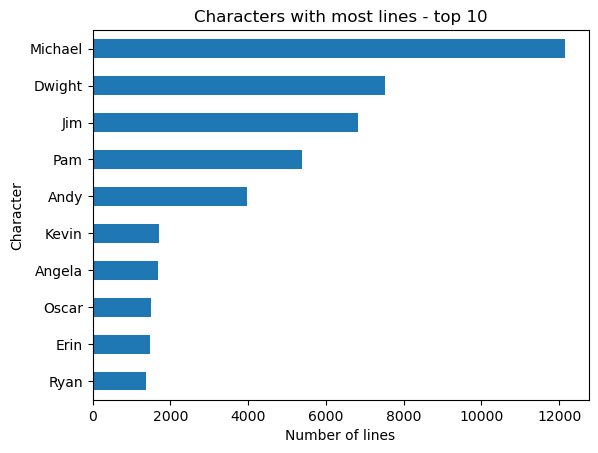

In [47]:
df_scripts_top_10 = df_scripts['speaker'].value_counts().head(10).sort_values().plot(kind='barh')
plt.title("Characters with most lines - top 10")
plt.xlabel("Number of lines")
plt.ylabel("Character")
plt.show()

However, for our analysis we will focus on top 3 - Michael, Dwight and Jim. Let's count the number of lines they have spoken in each episode.

In [48]:
selected_characters=['Michael','Dwight','Jim']
d = {}

def num_of_lines(columns):
    for x in columns:
        d[x] = pd.DataFrame()
        d[x] = df_scripts.loc[df_scripts['speaker'].str.contains(x)]
        d[x] = d[x].groupby(['Key_episode'], as_index=False)['line_text'].count()
        d[x] = d[x].rename(columns={"line_text": (x) + ' lines'})

num_of_lines(selected_characters)

Now let's create dataframe for all of them.

In [49]:
characters_lines = [d['Michael'], d['Dwight'], d['Jim']]

for x in characters_lines:
    df_to_analyse=df_to_analyse.merge(x, on='Key_episode', how='left') 
    
display(df_to_analyse)

,Key_episode,Season,NoPerSeason,EpisodeTitle,Ratings,Viewership,TotalLines,Michael lines,Dwight lines,Jim lines
0,1.1,1,1,Pilot,7.5,11.20,270,98.0,35,37.0
1,1.2,1,2,Diversity Day,8.3,6.00,297,103.0,40,35.0
2,1.3,1,3,Health Care,7.8,5.80,324,69.0,88,57.0
3,1.4,1,4,The Alliance,8.1,5.40,360,111.0,74,63.0
4,1.5,1,5,Basketball,8.4,5.00,312,135.0,46,27.0
...,...,...,...,...,...,...,...,...,...,...
181,9.19,9,19,Stairmageddon,8.0,3.83,273,NaN,61,15.0
182,9.20,9,20,Paper Airplane,8.0,3.25,234,NaN,21,17.0
183,9.21,9,21,Livin' the Dream,9.0,3.51,382,NaN,54,63.0
184,9.22,9,22,A.A.R.M.,9.5,4.56,501,NaN,89,91.0


# Most talkative character and its influence on rating and viewership?

What is the key to the success of the tv series? What makes the episode the most viewed or top rated? In series such as The Office dialogues are essential and make the core of each episode. So perhaps it does make a difference who is saying the most? Let's see if the three top most spoken characters has any influence on rating and viewership features.

In [50]:
display(df_to_analyse)

,Key_episode,Season,NoPerSeason,EpisodeTitle,Ratings,Viewership,TotalLines,Michael lines,Dwight lines,Jim lines
0,1.1,1,1,Pilot,7.5,11.20,270,98.0,35,37.0
1,1.2,1,2,Diversity Day,8.3,6.00,297,103.0,40,35.0
2,1.3,1,3,Health Care,7.8,5.80,324,69.0,88,57.0
3,1.4,1,4,The Alliance,8.1,5.40,360,111.0,74,63.0
4,1.5,1,5,Basketball,8.4,5.00,312,135.0,46,27.0
...,...,...,...,...,...,...,...,...,...,...
181,9.19,9,19,Stairmageddon,8.0,3.83,273,NaN,61,15.0
182,9.20,9,20,Paper Airplane,8.0,3.25,234,NaN,21,17.0
183,9.21,9,21,Livin' the Dream,9.0,3.51,382,NaN,54,63.0
184,9.22,9,22,A.A.R.M.,9.5,4.56,501,NaN,89,91.0


In [51]:
df_to_analyse_grouped = df_to_analyse[['Season','Michael lines', 'Dwight lines', 'Jim lines']].groupby(by=['Season'],as_index=False).agg('mean').round(0)
display(df_to_analyse_grouped)

,Season,Michael lines,Dwight lines,Jim lines
0,1,107.0,54.0,48.0
1,2,106.0,51.0,41.0
2,3,87.0,41.0,34.0
3,4,117.0,40.0,49.0
4,5,84.0,42.0,34.0
5,6,83.0,34.0,41.0
6,7,67.0,30.0,29.0
7,8,NaN,39.0,36.0
8,9,2.0,47.0,35.0


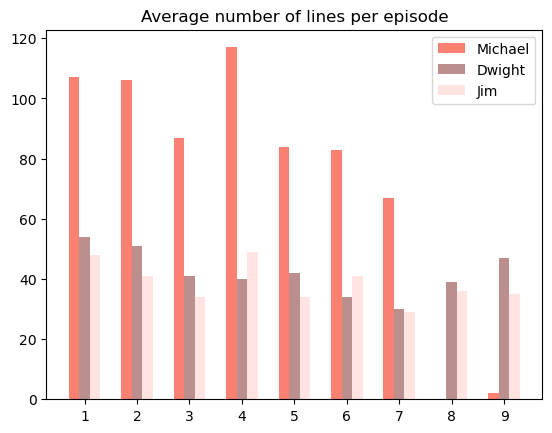

In [52]:
labels = list(df_to_analyse_grouped['Season'])
michael = list(df_to_analyse_grouped['Michael lines'])
dwight = list(df_to_analyse_grouped['Dwight lines'])
jim = list(df_to_analyse_grouped['Jim lines'])


x = np.arange(len(labels))
width = 0.4


ax = plt.subplot(111)
ax.bar(x - width/2, michael, width=0.2, align='center', color='salmon', label='Michael')
ax.bar(x, dwight, width=0.2, align='center',color='rosybrown', label='Dwight')
ax.bar(x + width/2, jim, width=0.2, align='center',color='mistyrose', label='Jim')

ax.set_xticks(x, labels)
ax.legend(loc='upper right')
plt.title("Average number of lines per episode")
plt.show()

Let's omit the EpisodeTitle column for further analysis.

In [53]:
df_to_analyse_cut = df_to_analyse.drop('EpisodeTitle', axis=1)
display(df_to_analyse_cut)

,Key_episode,Season,NoPerSeason,Ratings,Viewership,TotalLines,Michael lines,Dwight lines,Jim lines
0,1.1,1,1,7.5,11.20,270,98.0,35,37.0
1,1.2,1,2,8.3,6.00,297,103.0,40,35.0
2,1.3,1,3,7.8,5.80,324,69.0,88,57.0
3,1.4,1,4,8.1,5.40,360,111.0,74,63.0
4,1.5,1,5,8.4,5.00,312,135.0,46,27.0
...,...,...,...,...,...,...,...,...,...
181,9.19,9,19,8.0,3.83,273,NaN,61,15.0
182,9.20,9,20,8.0,3.25,234,NaN,21,17.0
183,9.21,9,21,9.0,3.51,382,NaN,54,63.0
184,9.22,9,22,9.5,4.56,501,NaN,89,91.0


Let's explore this dataframe seeking possible correlations.

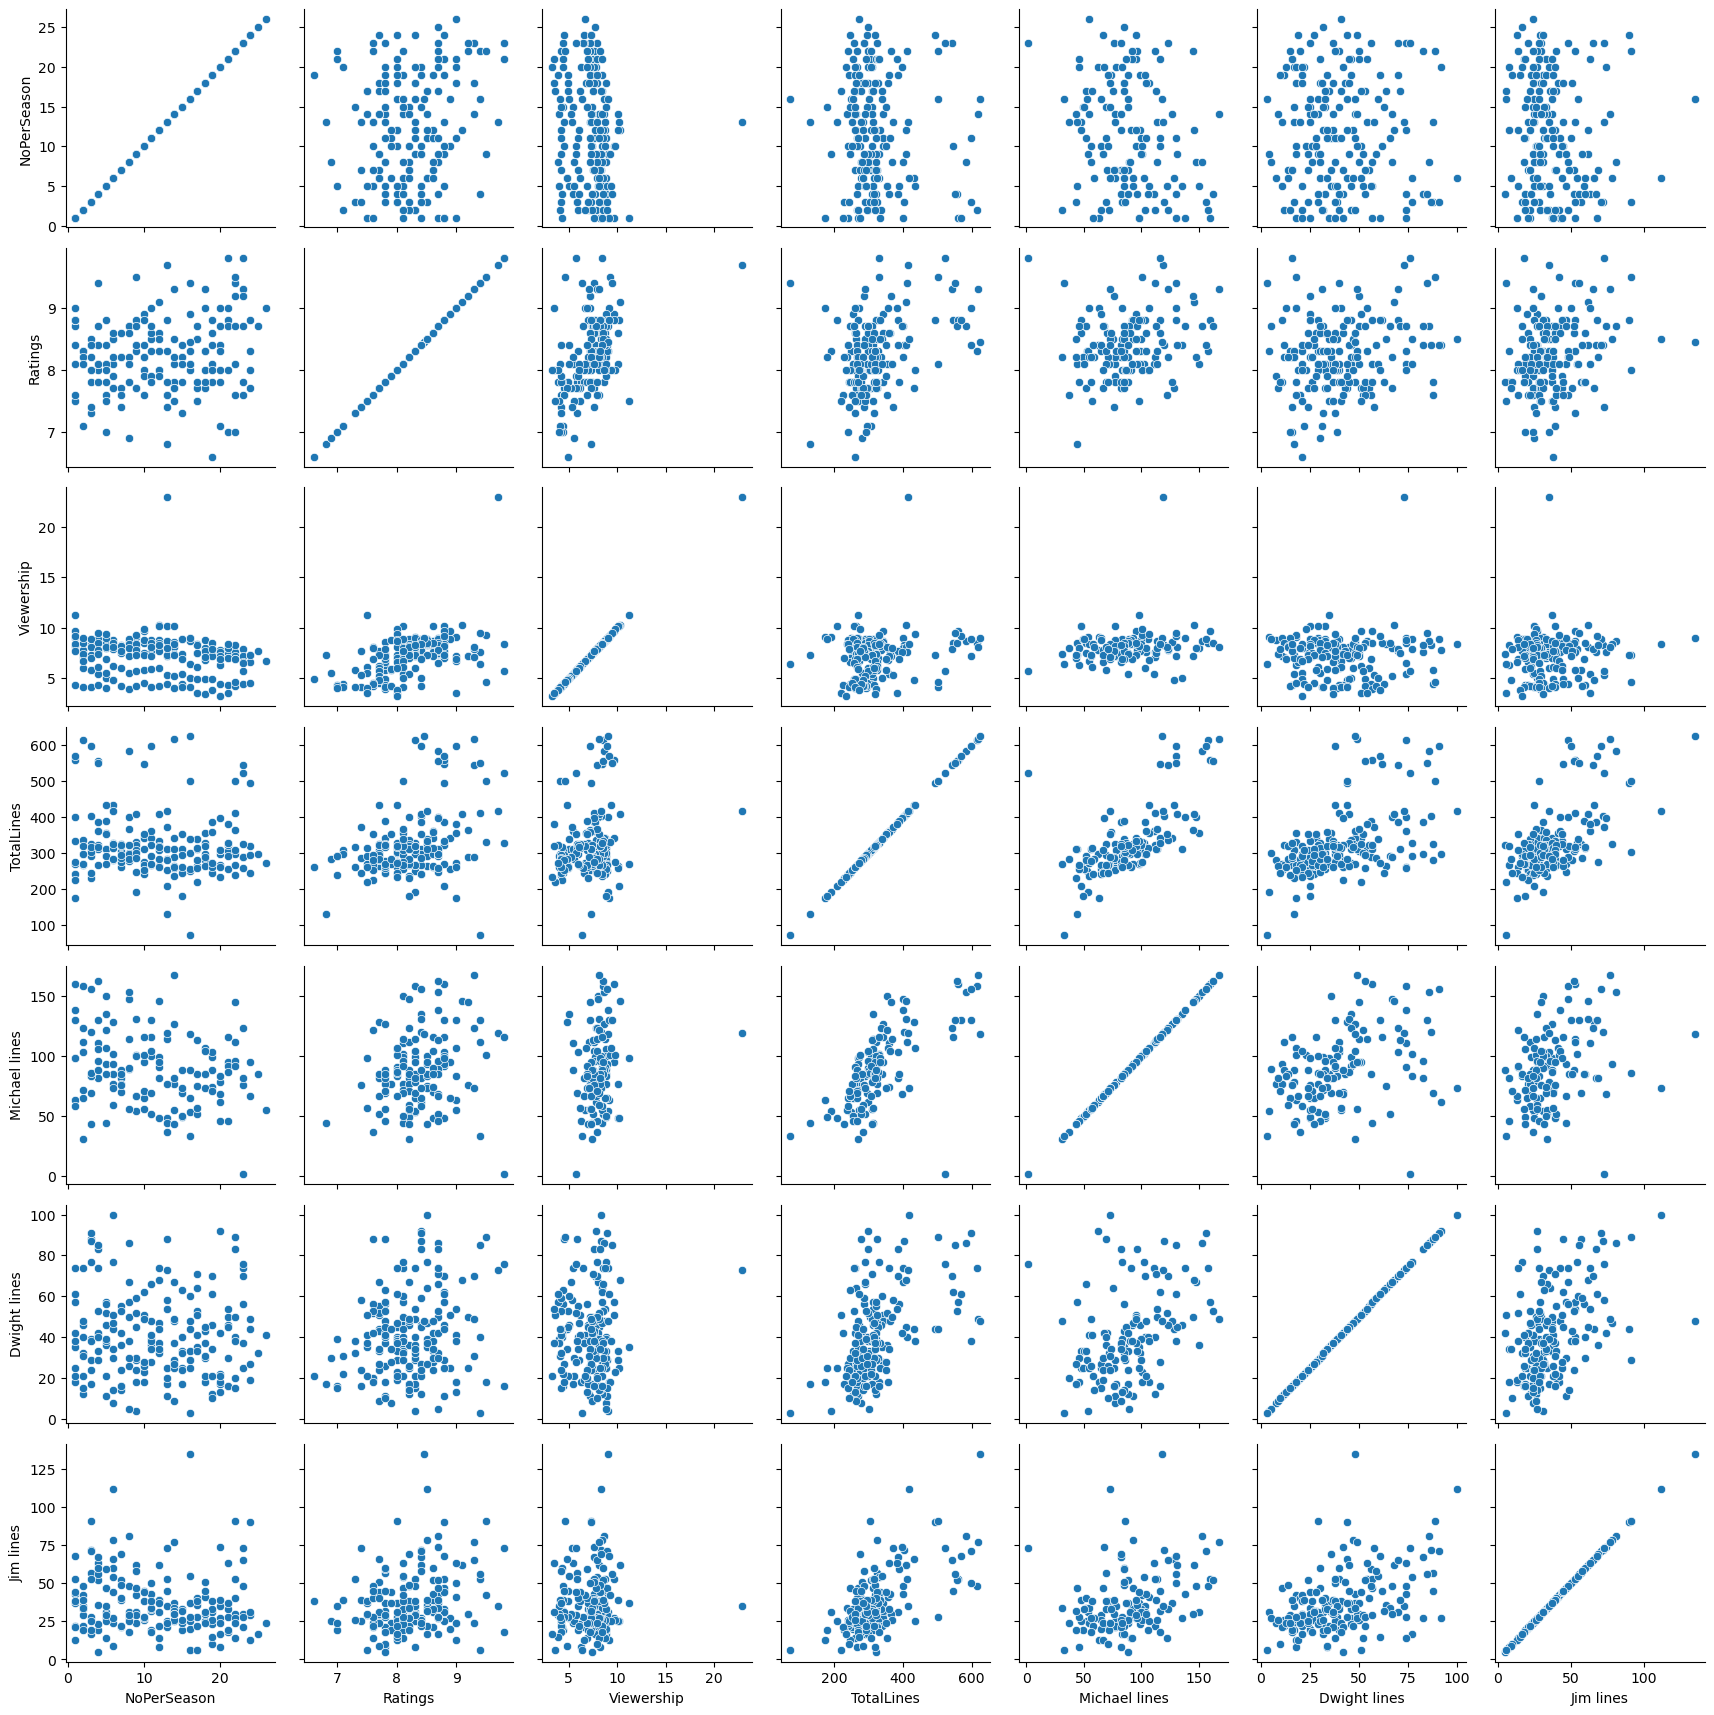

In [54]:
g = sns.PairGrid(df_to_analyse_cut)
g.map(sns.scatterplot)

<Axes: >

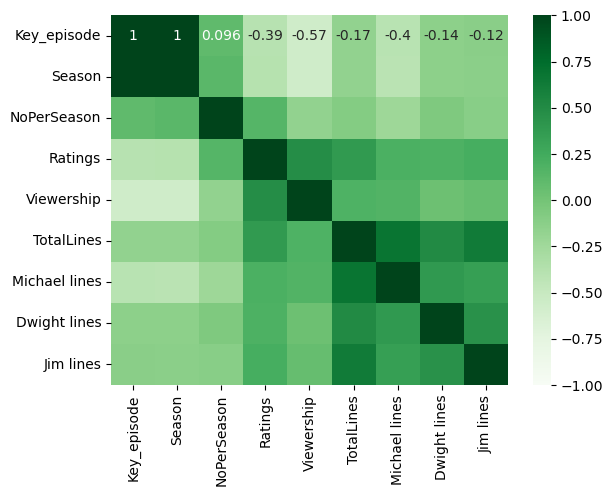

In [55]:
df_to_analyse_stat_corr = df_to_analyse_cut.corr()
sns.heatmap(df_to_analyse_stat_corr,  vmin=-1, vmax=1, cmap="Greens", annot=True)

In [56]:
df_to_analyse_stat_corr.style.background_gradient(cmap='coolwarm')

,Key_episode,Season,NoPerSeason,Ratings,Viewership,TotalLines,Michael lines,Dwight lines,Jim lines
Key_episode,1.000000,0.995315,0.095880,-0.394729,-0.568893,-0.167117,-0.400253,-0.136844,-0.118444
Season,0.995315,1.000000,0.128728,-0.389611,-0.568082,-0.170970,-0.413534,-0.136225,-0.130649
NoPerSeason,0.095880,0.128728,1.000000,0.152372,-0.164901,-0.089596,-0.230122,-0.055836,-0.110324
Ratings,-0.394729,-0.389611,0.152372,1.000000,0.481287,0.375214,0.201302,0.194255,0.223008
Viewership,-0.568893,-0.568082,-0.164901,0.481287,1.000000,0.181039,0.167956,0.037629,0.069847
TotalLines,-0.167117,-0.170970,-0.089596,0.375214,0.181039,1.000000,0.685974,0.506161,0.631115
Michael lines,-0.400253,-0.413534,-0.230122,0.201302,0.167956,0.685974,1.000000,0.389258,0.340194
Dwight lines,-0.136844,-0.136225,-0.055836,0.194255,0.037629,0.506161,0.389258,1.000000,0.450637
Jim lines,-0.118444,-0.130649,-0.110324,0.223008,0.069847,0.631115,0.340194,0.450637,1.000000


There is a slight correlation between Jim lines and rating of the episode. It is very weak, but higher that Dwight and Michael. Interesting is also significantly bigger correlation between Michael lines and Dwight&Jim lines.